# **Modelamiento digital**
---

## **Premodelamiento**
---

In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib --list

### **Librerias necesarias**

In [2]:
from sympy import sympify

### **Aplicación de elaboración propia**

In [3]:
from mm.forces import *
from mm.structures import *
from mm.sections import *
# from mm import *

### **Orden**
1. Momento
2. Punto
3. Distribuido

## **Abstracción de elementos**
---

#### **Creación de la sección**

In [4]:
caracteristicas_seccion = {
    'top_width': 0.250,
    'top_thickness': 0.038,
    'bottom_width': 0.150,
    'bottom_thickness': 0.038,
    'web_height': 0.300,
    'web_thickness': 0.025,
}
seccion = IShapedSection(**caracteristicas_seccion)
print(seccion)

id: 0x235c1d77dc0
== Section ==
- IShaped -
Total Area:	0.0227
Inertia:	0.0004740379477239353
max c:		0.2162907488986784
centroid:	0.2162907488986784


### **Creación de las fuerzas**

#### **Signos**

|abajo|arriba|
|:-:|:-:|
|-|+|

In [5]:
carga1 = Moment(18)
carga2 = PointLoad(sympify(151)/3)
carga3 = PointLoad(sympify(-25))
carga4 = DistributedLoad(sympify(-40))
carga5 = PointLoad(sympify(211)/3)
carga6 = Moment(-27)
print(carga1)

id: 0x235c1d75d20
== Force ==
 - Moment -
load => 0
moment => 18


### **Creación de la viga**

In [6]:
viga = Beam(section=seccion)

In [7]:
viga.addForce(carga1, 0)
viga.addForce(carga2, 0)
viga.addForce(carga3, 0.6)
viga.addForce(carga4, (1.2,3.6))
viga.addForce(carga5, 3.6)
viga.addForce(carga6, 3.6)
print(viga)

id: 0x235c1d74a90
== Structure ==
- Beam -
nº of loads: 6
nº of moments: 8


## _**Ploteo**_
---

In [8]:
viga.sfd

Piecewise((-151/3, (x < 0.6) & (x >= 0)), (-76/3, (x >= 0.6) & (x < 1.2)), (40*x - 73.3333333333333, (x >= 1.2) & (x <= 3.6)))

In [9]:
viga.bmd

Piecewise((151*x/3 - 18, (x < 0.6) & (x >= 0)), (25.3333333333333*x - 3.0, (x >= 0.6) & (x < 1.2)), (-20.0*x**2 + 73.3333333333333*x - 31.8, (x >= 1.2) & (x <= 3.6)))

In [10]:
from mm.plotting import plot_beam
import matplotlib.pyplot as plt

|c|reaccion v|reaccion m|
|-|-:|-:|
|1| $\uparrow$   |$\circlearrowright$|
|2| $\downarrow$ |$\circlearrowleft$|
|3| $\downarrow$ |$\circlearrowright$|
|4| $\uparrow$   |$\circlearrowleft$|

In [ ]:
%matplotlib widget

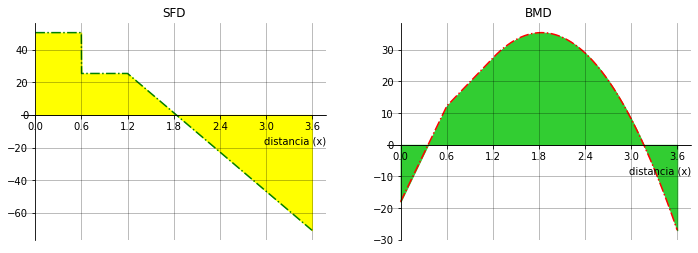

In [46]:
viga.convention = 3
plot_beam(viga, res=1000, division_ticks=8)

In [20]:
plt.close("all")

## **Esfuerzos máximos y mínimos**
---

In [31]:
viga.convention = 3

In [48]:
viga.sigma_report()

<IPython.core.display.Latex object>